# ESCUELA POLITÉCNICA NACIONAL

## MÉTODOS NUMÉRICOS

### TAREA 12

David Alejandro Puga Novoa - GR1CC - 05/02/2025

Las siguiente funciones fueron utilizados para el informe propiedad de Jonathan Zea (https://github.com/ztjona/EPN-numerical-analysis/blob/main/src/ODE.py)

In [3]:
from typing import Callable


# ####################################################################
def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [4]:
from math import factorial


def ODE_euler_nth(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    f_derivatives: list[Callable[[float, float], float]],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Taylor method with (m - 1)th derivatives for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``f_derivatives``: list of (m - 1)th derivatives of f
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        T = f(t, y)
        ders = [
            h / factorial(m + 2) * mth_derivative(t, y)
            for m, mth_derivative in enumerate(f_derivatives)
        ]
        T += sum(ders)
        y += h * T
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

- Generación de graficos

In [6]:
import matplotlib.pyplot as plt

def plot_ode_solutions(ts: list[float], ys_euler: list[float], ys_taylor: list[float] = None):
    plt.figure(figsize=(8, 5))
    plt.plot(ts, ys_euler, label="Euler Method", marker="o", linestyle="-", color="b")
    
    if ys_taylor:
        plt.plot(ts, ys_taylor, label="Taylor Method", marker="s", linestyle="--", color="r")
    
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.title("Numerical Solution of ODE")
    plt.legend()
    plt.grid(True)
    plt.show()

#### Utilice el método de Euler para aproximar las soluciones para cada uno de los siguientes problemas de valor inicial. 

#### a) $y' = \frac{y}{t} - (\frac{y}{t})^2$, $1 \le t \le 2$, $y(1) = 1$, con $h = 0.1$.

El valor de h es: 0.1


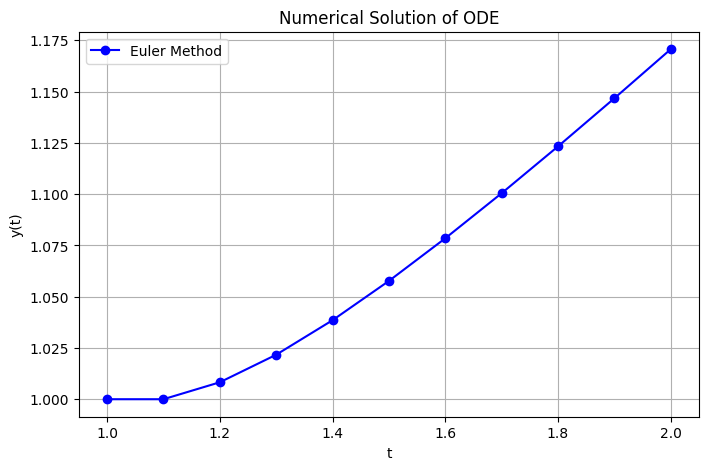

In [17]:
y_der = lambda t, y: y/t - (y/t)**2
y_init = 1

ys3a, ts3a, h = ODE_euler(a = 1, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
plot_ode_solutions(ts3a, ys3a)

#### b) $y' = 1 + \frac{y}{t} + (\frac{y}{t})^2$, $1 \le t \le 3$, $y(1) = 0$, con $h = 0.2$.

El valor de h es: 0.2


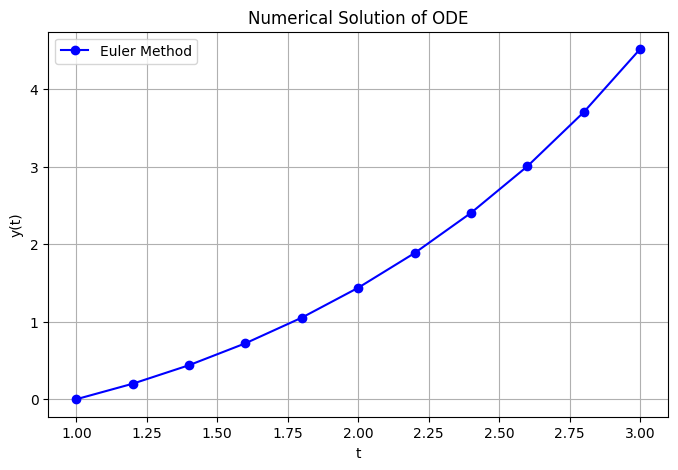

In [18]:
y_der = lambda t, y: 1 + y/t + (y/t)**2
y_init = 0

ys3b, ts3b, h = ODE_euler(a = 1, b = 3, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
plot_ode_solutions(ts3b, ys3b)

#### c) $y' = -(y + 1)(y + 3)$, $0 \le t \le 2$, $y(0) = -2$, con $h = 0.2$.

El valor de h es: 0.2


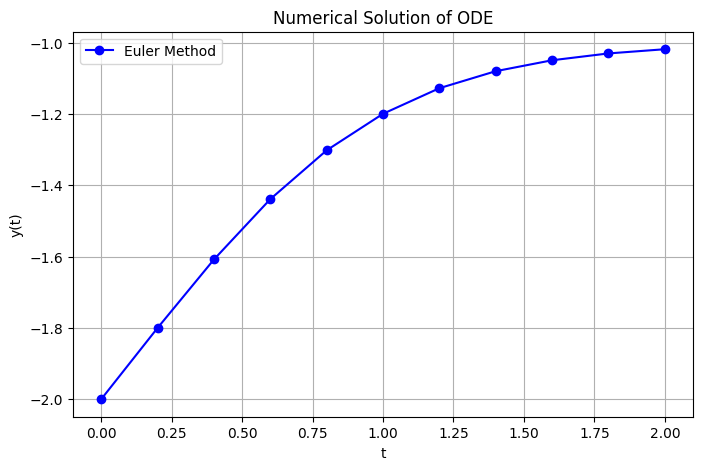

In [19]:
y_der = lambda t, y: -(y + 1)*(y + 3)
y_init = -2

ys3c, ts3c, h = ODE_euler(a = 0, b = 2, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
plot_ode_solutions(ts3c, ys3c)

#### d) $y' = -5y + 5t^2 + 2t$, $0 \le t \le 1$, $y(0) = \frac{1}{3}$, con $h = 0.1$.

El valor de h es: 0.1


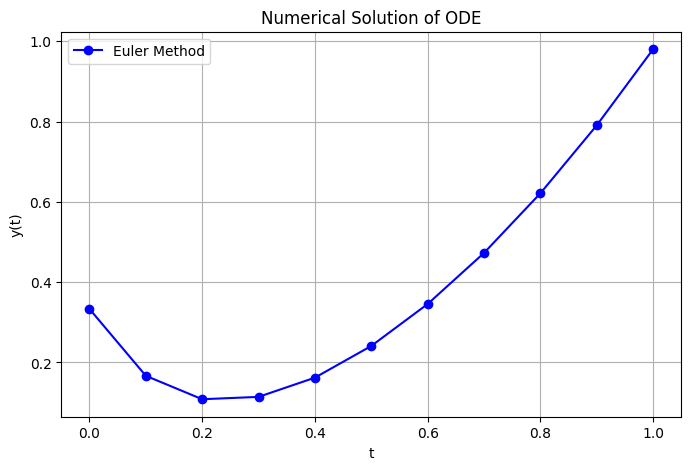

In [20]:
y_der = lambda t, y: -5*y + 5*t**2 + 2*t
y_init = 1/3

ys3d, ts3d, h = ODE_euler(a = 0, b = 1, f = y_der, y_t0 = y_init, N = 10)

print(f"El valor de h es: {h}")
plot_ode_solutions(ts3d, ys3d)

### Aquí se dan las soluciones reales para los problemas de valor inicial en el ejercicio 3. Calcule el error real en las aproximaciones del ejercicio 3. 

#### a) $y(t) = \frac{t}{1 + \ln{t}}$

In [27]:
import math
import numpy as np

def y1(t):
    return t / (1 + math.log(t))

errorReal = np.mean([abs(y1(t) - y_aprox) / abs(y1(t)) for y_aprox, t in zip(ys3a, ts3a)])
print(f"El error real es: {errorReal}")

El error real es: 0.007446209946514101


#### b) $y(t) = t \tan{\ln{t}}$

In [56]:
def y2(t):
    return t*math.tan(math.log(t))

errorReal = np.mean([abs(y2(t) - y_aprox) / abs(y2(t)) for y_aprox, t in zip(ys3b, ts3b)])
print(f"El error real es: {errorReal}")

ZeroDivisionError: float division by zero

#### c) $y(t) = - 3 + \frac{2}{1 + e^{-2t}}$

In [41]:
def y3(t):
    return - 3 + 2/(1 + math.exp(-2*t))

errorReal = np.mean([abs(y3(t) - y_aprox) / abs(y3(t)) for y_aprox, t in zip(ys3c, ts3c)])
print(f"El error real es: {errorReal}")

El error real es: 0.019424466913874762


#### d) $y(t) = t^2 + \frac{1}{3} e^{-5t}$

In [45]:
def y4(t):
    return t**2 + (1/3)*math.exp(-5*t)

errorReal = np.mean([abs(y4(t) - y_aprox) / abs(y4(t)) for y_aprox, t in zip(ys3d, ts3d)])
print(f"El error real es: {errorReal}")

El error real es: 0.1290954106813849


### Utilice los resultados del ejercicio 3 y la interpolación lineal para aproximar los siguientes valores de 𝑦(𝑡). Compare las aproximaciones asignadas para los valores reales obtenidos mediante las funciones determinadas en el ejercicio 4.

#### a) $y(0.25)$ y $y(0.93)$.

In [46]:
res = y1(0.25)
print(res)

res = y1(0.93)
print(res)

-0.6471748623905226
1.0027718477462106


#### b) $y(1.25)$ y $y(1.93)$.

In [47]:
res = y2(1.25)
print(res)

res = y2(1.93)
print(res)

0.2836531261952289
1.4902277738186658


#### c) $y(2.10)$ y $y(2.75)$.

In [51]:
res = y3(2.1)
print(res)

res = y3(2.75)
print(res)

-1.0295480633865461
-1.008140275431792


#### d) $y(0.54)$ y $y(0.94)$.

In [55]:
res = y4(0.54)
print(res)

res = y4(0.94)
print(res)

0.3140018375799166
0.8866317590338986
